<a href="https://colab.research.google.com/github/muhnasih/PCVK_GANJIL_2025/blob/main/Tugas_Praktikum_Kelompok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

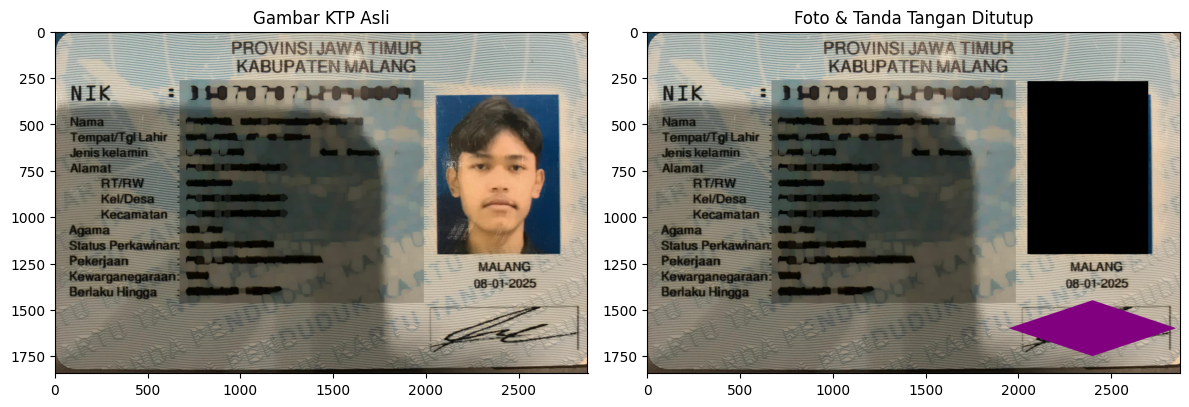

In [ ]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt
import numpy as np

try:
  image_path = '/content/drive/MyDrive/Image/KTP.jpg'
except NameError:
  print("Harap jalankan sel pertama untuk mengunggah file terlebih dahulu!")

# Membaca gambar menggunakan OpenCV
image_bgr = cv2.imread(image_path)

if image_bgr is None:
    print(f"Error: Tidak dapat membaca file gambar di path: {image_path}")
else:
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

    image_modified = image_rgb.copy()

    # 3. Menutup bagian FOTO
    foto_rect = {'start_point': (2050, 270), 'end_point': (2700, 1200)}

    # Gambar persegi panjang hitam tebal untuk menutupi foto
    cv2.rectangle(
        image_modified,
        foto_rect['start_point'],
        foto_rect['end_point'],
        color=(0, 0, 0),
        thickness=-1
    )

    # Menutup bagian TANDA TANGAN
    ttd_center_x = 2400
    ttd_center_y = 1600
    ttd_width = 900
    ttd_height = 300

    # 1. Titik paling kiri
    pt1 = (ttd_center_x - ttd_width // 2, ttd_center_y)
    # 2. Titik paling atas
    pt2 = (ttd_center_x, ttd_center_y - ttd_height // 2)
    # 3. Titik paling kanan
    pt3 = (ttd_center_x + ttd_width // 2, ttd_center_y)
    # 4. Titik paling bawah
    pt4 = (ttd_center_x, ttd_center_y + ttd_height // 2)

    # Gabungkan titik-titik menjadi satu array NumPy
    points = np.array([pt1, pt2, pt3, pt4], dtype=np.int32)

    # Gambar poligon (belah ketupat) untuk menutupi tanda tangan
    cv2.fillPoly(
        image_modified,
        pts=[points],         # Array dari titik-titik sudut
        color=(128, 0, 128)
    )

    # Menampilkan kedua gambar (asli dan yang dimodifikasi) berdampingan
    plt.figure(figsize=(12, 6)) # Mengatur ukuran figure agar lebih besar

    # Tampilkan gambar asli
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title('Gambar KTP Asli')

    # Tampilkan gambar yang sudah dimodifikasi
    plt.subplot(1, 2, 2)
    plt.imshow(image_modified)
    plt.title('Foto & Tanda Tangan Ditutup')

    plt.tight_layout()
    plt.show()